<a href="https://colab.research.google.com/github/hk-567/NLP/blob/main/NLTK_text_based_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tokenization

The **first** step in natural language processing

It's the process of breaking strings into tokens

The steps of tokenization:
1. Breaking a complex sentence into words
2. Understanding the importance of each word with respect to the sentence
3. Produce a structural description on an input sentence

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as numpy
import nltk #natural language tool kit
nltk.download('popular') #popular packages within NLTK that we need
import nltk.corpus #a corpus can be defined as a collection of text documents


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [ ]:
#sample text for tokenization
text = "In Brazil they drive on the right-hand side of the road. Brazil has a large coastline on the eastern side of south america "
#import the tokenize function from nltk
from nltk.tokenize import word_tokenize
#pass string into word tokenize to break the sentence
token = word_tokenize(text)
token


['In',
 'Brazil',
 'they',
 'drive',
 'on',
 'the',
 'right-hand',
 'side',
 'of',
 'the',
 'road',
 '.',
 'Brazil',
 'has',
 'a',
 'large',
 'coastline',
 'on',
 'the',
 'eastern',
 'side',
 'of',
 'south',
 'america']

In [ ]:
#frequency distinct
from nltk.probability import FreqDist #import FreqDist library
fdist = FreqDist(token)
fdist

fdist1 = fdist.most_common(10)
fdist1

[('the', 3),
 ('Brazil', 2),
 ('on', 2),
 ('side', 2),
 ('of', 2),
 ('In', 1),
 ('they', 1),
 ('drive', 1),
 ('right-hand', 1),
 ('road', 1)]

##Stemming


Word stems are know as the *base form* of a word - and we can create new words by attaching affixes to them (inflection)

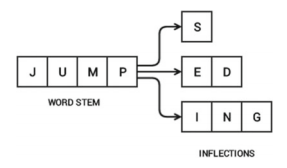

The reverse process of obtaining the base form of a word from its inflected form is known as **stemming**



**wait** <-- waited / waiting / waits


Two different methods for stemming:

1. Porter Stemming
  - removes common morphological and inflectional endings from words
2. Lancaster Stemming
  - a more agressive stemming algorithm

In [ ]:
#import portstemmer for nltk library
from nltk.stem import PorterStemmer
pst = PorterStemmer()
print("Porter Stemming example:")
word = "waiting"
stemmed = pst.stem(word)
stemmed

stm = ["give", "gave","giving","given","lazy"]
for word in stm:
  print (word+ ":"+ pst.stem(word))
#wait vs give

Porter Stemming example:
give:give
gave:gave
giving:give
given:given
lazy:lazi


In [ ]:
#import lancasterstemmer from nltk library
from nltk.stem import LancasterStemmer
lst = LancasterStemmer()

stm = ["give", "gave","giving","given","lazy"]
for word in stm:
  print (word+ ":"+ lst.stem(word))


give:giv
gave:gav
giving:giv
given:giv
lazy:lazy


## Lemmatization
Process of conveting a word into its base form

The difference between stemming and lemmatization is:

> **Lemmatization** considers the context and coverts the word to its meaningful base form

>**Stemming** just removes the last few characters (often leading to incorrect meanings and spelling errors)






In [ ]:
#import lemmatizer library
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

print("rocks: ", lemmatizer.lemmatize("rocks"))
print("corpora: ", lemmatizer.lemmatize("corpora"))

rocks:  rock
corpora:  corpus


##Stop Words
The most common words in a language like “the”, “a”, “at”, “for”, “above”, “on”, “is”, “all"

>They do not provide any meaning and are usually removed from texts

In [ ]:
#import stopwords

#from nltk import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

tokenizer = ToktokTokenizer()
stopword_list = stopwords.words('english')

a = set(stopwords.words('english'))

text = "Cristiano Ronaldo was born on February 5, 1985, in Funchal, Madeira, Portugal."
def remove_stopwords(text, is_lower_case = False):
  tokens= tokenizer.tokenize(text)
  tokens = [token.strip() for token in tokens]
  if is_lower_case:
    filtered_tokens = [token for token in tokens if token not in stopword_list]
  else:
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
  filtered_text = ' '.join(filtered_tokens)
  return filtered_text

remove_stopwords(text)


'Cristiano Ronaldo born February 5 , 1985 , Funchal , Madeira , Portugal .'

## Part of speech tagging (POS)


Used to assign parts of the speech to each word of a given text based on its definiton and its context
  *(nouns, verbs, pronouns, adverbs, conjunction, adjectives, interjection)*

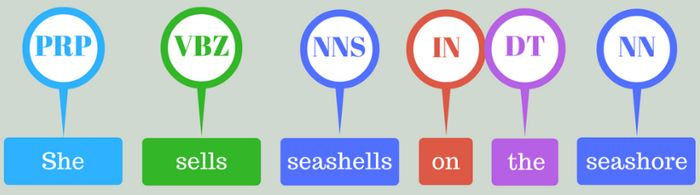


> POS taggers are widely available (also in the NLTK library)



The list of POS tags is as follows, with examples of what each POS stands for.
* CC coordinating conjunction
* CD cardinal digit
* DT determiner
* EX existential there (like: “there is” … think of it like “there exists”)
* FW foreign word
* IN preposition/subordinating conjunction
* JJ adjective ‘big’
* JJR adjective, comparative ‘bigger’
* JJS adjective, superlative ‘biggest’
* LS list marker 1)
* MD modal could, will
* NN noun, singular ‘desk’
* NNS noun plural ‘desks’
* NNP proper noun, singular ‘Harrison’
* NNPS proper noun, plural ‘Americans’
* PDT predeterminer ‘all the kids’
* POS possessive ending parent’s
* PRP personal pronoun I, he, she
* PRP$$ possessive pronoun my, his, hers
* RB adverb very, silently,
* RBR adverb, comparative better
* RBS adverb, superlative best
* RP particle give up
* TO, to go ‘to’ the store.
* UH interjection, errrrrrrrm
* VB verb, base form take
* VBD verb, past tense took
* VBG verb, gerund/present participle taking
* VBN verb, past participle taken
* VBP verb, sing. present, non-3d take
* VBZ verb, 3rd person sing. present takes
* WDT wh-determiner which
* WP wh-pronoun who, what
* WP$ possessive wh-pronoun whose
* WRB wh-abverb where, when



In [ ]:
text = "vote to choose a particular man or a group (party) to represent them in parliament"
tex = word_tokenize(text)
for token in tex:
  print(nltk.pos_tag([token]))

[('vote', 'NN')]
[('to', 'TO')]
[('choose', 'NN')]
[('a', 'DT')]
[('particular', 'JJ')]
[('man', 'NN')]
[('or', 'CC')]
[('a', 'DT')]
[('group', 'NN')]
[('(', '(')]
[('party', 'NN')]
[(')', ')')]
[('to', 'TO')]
[('represent', 'NN')]
[('them', 'PRP')]
[('in', 'IN')]
[('parliament', 'NN')]


##Shallow Parsing (Chunking)



Popular technique of analyszing the structure of a sentence to break it down into its smallest consitituents (which are tokens such as words) and group them together to form higher-level phrases.



> 5 major categories of phrases:
*   Noun phrase (NP): These are phrases where a noun acts as the head word. Noun phrases act as a subject or object to a verb.
* Verb phrase (VP): These phrases are lexical units that have a verb acting as the head word. Usually, there are two forms of verb phrases. One form has the verb components as well as other entities such as nouns, adjectives, or adverbs as parts of the object.
* Adjective phrase (ADJP): These are phrases with an adjective as the head word. Their main role is to describe or qualify nouns and pronouns in a sentence, and they will be either placed before or after the noun or pronoun.
* Adverb phrase (ADVP): These phrases act like adverbs since the adverb acts as the head word in the phrase. Adverb phrases are used as modifiers for nouns, verbs, or adverbs themselves by providing further details that describe or qualify them.
* Prepositional phrase (PP): These phrases usually contain a preposition as the head word and other lexical components like nouns, pronouns, and so on. These act like an adjective or adverb describing other words or phrases.

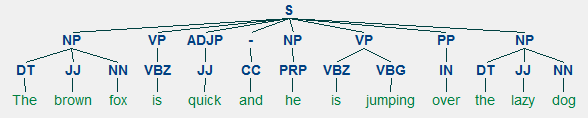

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
sentence = "we saw this yellow dog while it rained hotdogs. "
tokens = nltk.word_tokenize(sentence)
print ("tokens =", tokens)

tagged = nltk.pos_tag(tokens)

entities = nltk.chunk.ne_chunk(tagged)
print("entities =", entities)

tokens = ['we', 'saw', 'this', 'yellow', 'dog', 'while', 'it', 'rained', 'hotdogs', '.']
entities = (S
  we/PRP
  saw/VBD
  this/DT
  yellow/JJ
  dog/NN
  while/IN
  it/PRP
  rained/VBD
  hotdogs/NNS
  ./.)


##Other NLP Techniques



Article goes on to talk about diff types of parsing and further analysis

**Constiuency Parsing** - Internal strucutre or sentence in terms of a hierarchically ordered structure of their consitutents
   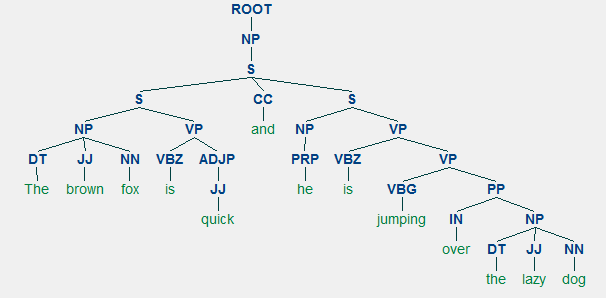


**Dependency Parsing** - Basic principle that in any sentence in the language, all words except one, have some relationship or dependency on other words in the structure
- The word that have no dependency on another is the ROOT of the sentence
  - All other words are (in)directly linked to to the root verb using links(dependencies)

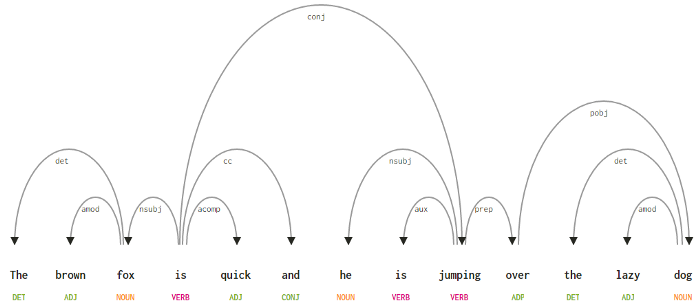

https://universaldependencies.org/u/dep/index.html

**Named Entity Recognition** (Entity Chunking/Extraction) - Specifically refer to terms that represent real-world objects like people, places, organizations, etc

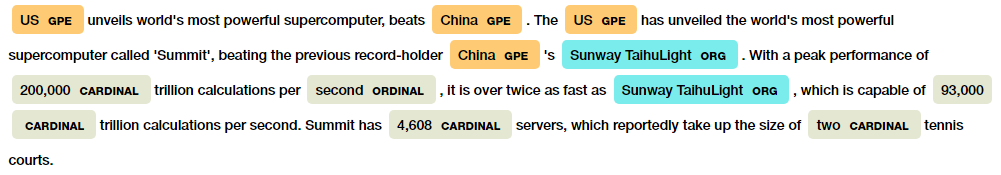

**Above image is an example using the spaCy API**

  - Below table shows the entity objects within the API and their codes

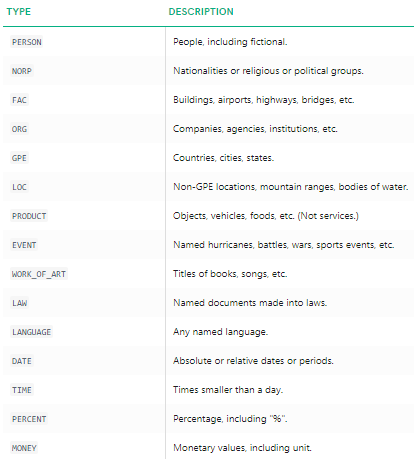

##Uses

**Sentiment analysis** The key aspect is to analyze a body of text for understanding the opinion expressed by it.


* Typically, we quantify this **sentiment** with a positive or negative value,
called **polarity**.

* The overall sentiment is often inferred as positive, neutral or negative from the sign of the polarity score.


 > ! Works best on text that has a subjective context

There are two major approaches to sentiment analysis:
- Supervised machine learning or deep learning approaches
- Unsupervised lexicon-based approaches

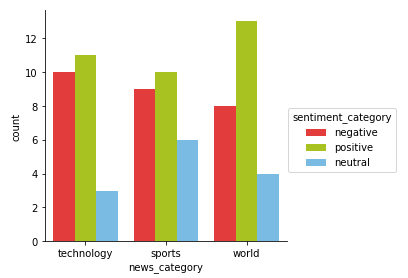



## Websites used and extra resources
https://www.kdnuggets.com/2020/05/text-mining-python-steps-examples.html

https://medium.com/@gianpaul.r/tokenization-and-parts-of-speech-pos-tagging-in-pythons-nltk-library-2d30f70af13b

https://towardsdatascience.com/a-practitioners-guide-to-natural-language-processing-part-i-processing-understanding-text-9f4abfd13e72

https://www.bogotobogo.com/python/NLTK/chunking_NLTK.php